# Atividade 07 - Otimização por Colônia de Formigas
- 202108075 – ANDRÉ LUIS ARAÚJO DE SOUZA<br>
- 202105848 – HUGO FERNANDES SILVA<br>
- 202105854 – LUCAS BRANDÃO RODRIGUES<br>
- 202105858 – MARCELO HENRIQUE LOPES FERREIRA<br>
- 202105865 – RAFAEL ALVES GOIAS<br>

### Descrição do problema

O problema "Férias na Romênia" é um exemplo clássico de aplicação do algoritmo de busca em grafos, apresentado no livro "Artificial Intelligence: A Modern Approach" de Peter Norvig e Stuart Russell.

Nesse problema, consideramos um turista que está planejando suas férias na Romênia e deseja visitar várias cidades. O objetivo é encontrar o caminho de menor custo (distância) que o turista deve percorrer para visitar todas as cidades desejadas e, eventualmente, retornar à cidade inicial. A Figura abaixo, extraída do livro citado, mostra o mapa rodoviário da Romênia contendo as distâncias, em KM, entre diversas cidades.

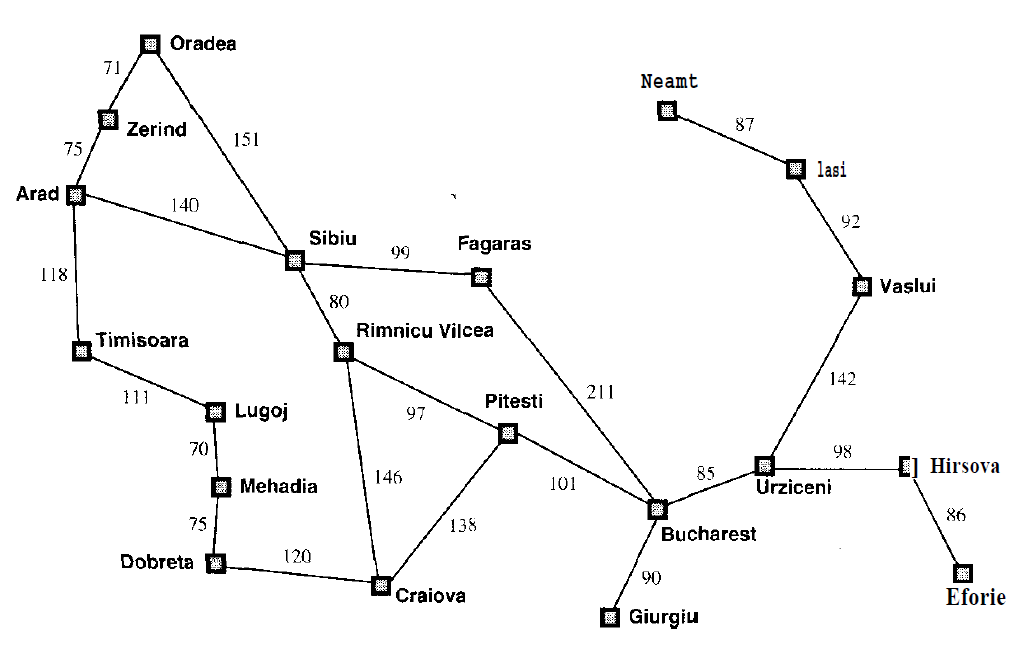


### Representação do problema

Na codificação a seguir, foi utilizada uma lista de adjacências para representar a conexão entre as cidades. A distância entre cada cidade é associada a cada aresta existente. Existem outras formas de representar o problema? Qual seria mais eficiente e em quais casos?

In [ ]:
def inicializa_mapa(depots):
    # Definir as cidades
    cities = [
        "Arad",
        "Bucareste",
        "Craiova",
        "Dobreta",
        "Eforie",
        "Fagaras",
        "Giurgiu",
        "Hirsova",
        "Iase",
        "Lugoj",
        "Mehadia",
        "Neamt",
        "Oradea",
        "Pitesti",
        "Rimnicu Vilcea",
        "Sibiu",
        "Urziceni",
        "Timisoara",
        "Vaslui",
        "Zerind"
    ]

    # Definir as conexões entre as cidades
    connections = [
        ("Arad", "Zerind", 75),
        ("Arad", "Sibiu", 140),
        ("Arad", "Timisoara", 118),
        ("Bucareste", "Fagaras", 211),
        ("Bucareste", "Giurgiu", 90),
        ("Bucareste", "Pitesti", 101),
        ("Bucareste", "Urziceni", 85),
        ("Craiova", "Dobreta", 120),
        ("Craiova", "Pitesti", 138),
        ("Craiova", "Rimnicu Vilcea", 146),
        ("Dobreta", "Mehadia", 75),
        ("Eforie", "Hirsova", 86),
        ("Fagaras", "Sibiu", 99),
        ("Hirsova", "Urziceni", 98),
        ("Iase", "Neamt", 87),
        ("Iase", "Vaslui", 92),
        ("Lugoj", "Mehadia", 70),
        ("Lugoj", "Timisoara", 111),
        ("Urziceni", "Hirsova", 98),
        ("Oradea", "Sibiu", 151),
        ("Oradea", "Zerind", 71),
        ("Pitesti", "Rimnicu Vilcea", 97),
        ("Rimnicu Vilcea", "Sibiu", 80),
        ("Urziceni", "Vaslui", 142)
    ]

    # Matriz de distâncias euclidianas entre as cidades conectadas por estradas
    distances = [
        [0, 366, 308, 120, 466, 176, 241, 422, 406, 229, 204, 586, 380, 100, 193, 253, 80, 199, 374],
        [366, 0, 160, 340, 526, 211, 90, 525, 428, 246, 446, 719, 449, 101, 211, 280, 203, 380, 510],
        [308, 160, 0, 200, 385, 261, 124, 453, 354, 232, 426, 697, 366, 94, 169, 238, 319, 496, 403],
        [120, 340, 200, 0, 283, 329, 206, 376, 389, 220, 117, 497, 282, 221, 111, 199, 100, 287, 257],
        [466, 526, 385, 283, 0, 446, 417, 168, 562, 434, 294, 756, 687, 343, 473, 542, 449, 618, 374],
        [176, 211, 261, 329, 446, 0, 137, 357, 291, 141, 262, 511, 180, 300, 99, 176, 268, 445, 207],
        [241, 90, 124, 206, 417, 137, 0, 402, 299, 168, 337, 614, 391, 196, 252, 334, 156, 345, 297],
        [422, 525, 453, 376, 168, 357, 402, 0, 501, 375, 275, 677, 616, 319, 430, 496, 402, 581, 333],
        [406, 428, 354, 389, 562, 291, 299, 501, 0, 183, 345, 568, 339, 312, 208, 278, 223, 402, 350],
        [229, 246, 232, 220, 434, 141, 168, 375, 183, 0, 152, 469, 261, 130, 140, 218, 170, 349, 98],
        [204, 446, 426, 117, 294, 262, 337, 275, 345, 152, 0, 380, 206, 184, 74, 150, 58, 238, 244],
        [586, 719, 697, 497, 756, 511, 614, 677, 568, 469, 380, 0, 671, 502, 487, 559, 660, 840, 542],
        [380, 449, 366, 282, 687, 180, 391, 616, 339, 261, 206, 671, 0, 317, 197, 279, 468, 645, 318],
        [100, 101, 94, 221, 343, 300, 196, 319, 312, 130, 184, 502, 317, 0, 118, 186, 307, 483, 216],
        [193, 211, 169, 111, 473, 99, 252, 430, 208, 140, 74, 487, 197, 118, 0, 77, 376, 554, 237],
        [253, 280, 238, 199, 542, 176, 334, 496, 278, 218, 150, 559, 279, 186, 77, 0, 403, 579, 313],
        [80, 203, 319, 100, 449, 268, 156, 402, 223, 170, 58, 660, 468, 307, 376, 403, 0, 181, 395],
        [199, 380, 496, 287, 618, 445, 345, 581, 402, 349, 238, 840, 645, 483, 554, 579, 181, 0, 556],
        [374, 510, 403, 257, 374, 207, 297, 333, 350, 98, 244, 542, 318, 216, 237, 313, 395, 556, 0]
    ]

    # Criar um grafo
    G = nx.Graph()
    D = nx.Graph()

    # Adicionar nós (cidades) ao grafo
    for city in cities:
        G.add_node(city)
        D.add_node(city)

    # Adicionar arestas (conexões) com distâncias muito longas. Serve para tornar G em um grafo completo
    for city1 in cities:
        for city2 in cities:
            if city1 != city2:
                G.add_edge(city1, city2, weight=10000)

    # Adicionar arestas (conexões) ao grafo com as distâncias
    for connection in connections:
        city1, city2, distance = connection
        G.add_edge(city1, city2, weight=distance)
        D.add_edge(city1, city2, weight=distance)

    return G, D, cities



def plot_grafico_cidades(D):    #### PLOT DO GRÁFICO DAS CIDADES
    # Posicionar os nós do grafo
    pos = nx.spring_layout(D, seed=42)

    # Plotar o grafo
    plt.figure(figsize=(10,10))

    nx.draw_networkx(D, pos, with_labels=True, node_size=500, node_color='lightblue', font_size=8, font_weight='bold')

    # Definir os centros de distribuição
    for dep in depots:
        nx.draw_networkx_nodes(D,pos,nodelist=[dep], node_color='red')

    edge_labels = nx.get_edge_attributes(D, 'weight')

    nx.draw_networkx_edge_labels(D, pos, edge_labels=edge_labels)
    plt.title('Grafo de Distâncias entre Cidades')
    plt.show()


## Solução geral do problema


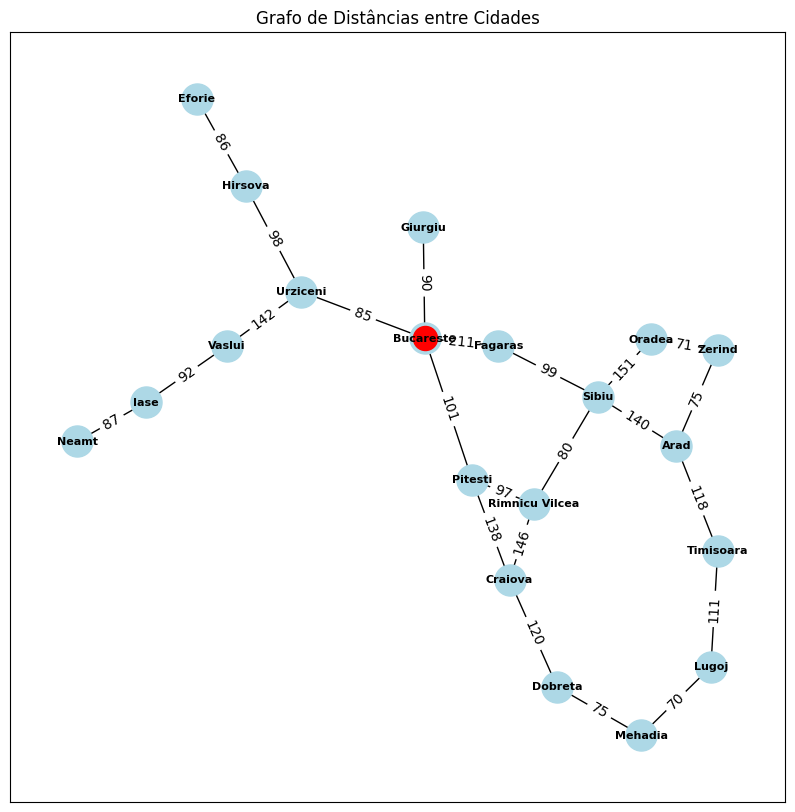

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

depots = ["Bucareste"]
G, D, cities = inicializa_mapa(depots)
plot_grafico_cidades(D)

## Otimização por Colônia de Formigas

### Definição da Classe formiga contento a construção do caminho a ser percorrido e o custo de tal caminho

In [ ]:
import random
import numpy as np

class Formiga:
    def __init__(self, grafo, posicao_inicial, alpha, beta, matriz_feromonios):
        self.posicao_inicial = posicao_inicial
        self.caminho = self.construir_caminho(grafo, alpha, beta, matriz_feromonios)
        self.custo_caminho = self.funcao_fitness(grafo)


    #### Função para criar o caminho a ser percorrido pela formiga
    def construir_caminho(self, grafo, alpha, beta, matriz_feromonios):
        self.caminho = [self.posicao_inicial]  # Inicializa o caminho com a posição inicial da formiga
        while len(self.caminho) < len(grafo.nodes):
            proxima_cidade = self.selecionar_proxima_cidade(grafo, alpha, beta, matriz_feromonios)
            self.caminho.append([proxima_cidade])

        self.caminho.append(self.posicao_inicial)

        return self.caminho


    def selecionar_proxima_cidade(self, grafo, alpha, beta, matriz_feromonios):

        # grafo: O grafo de distâncias entre as cidades.
        # matriz_feromonios: A matriz de feromônios que representa as transições entre as cidades.
        # alpha: O parâmetro de peso para a importância dos feromônios.
        # beta: O parâmetro de peso para a importância da heurística.

        posicao_atual = self.caminho[-1]
        cidades_disponiveis = [cidade for cidade in grafo.neighbors(posicao_atual[0]) if cidade not in [c[0] for c in self.caminho]]

        # # Calcula as probabilidades de seleção para as cidades disponíveis
        probabilidades = []
        for cidade in cidades_disponiveis:

            indice_posicao_atual = cities.index(posicao_atual[0])
            indice_cidade = cities.index(cidade)
            feromonio = matriz_feromonios[indice_posicao_atual][indice_cidade]
            distancia = grafo[posicao_atual[0]][cidade]['weight']
            probabilidade = feromonio ** alpha * (1.0 / distancia) ** beta
            probabilidades.append(probabilidade)

        # Seleciona a próxima cidade com base nas probabilidades
        soma_probabilidades = sum(probabilidades)
        probabilidades_normalizadas = [p / soma_probabilidades for p in probabilidades]
        proxima_cidade = random.choices(cidades_disponiveis, weights=probabilidades_normalizadas)[0]

        return proxima_cidade



    #### Função para calcular o custo do caminho percorrido pela formiga
    def funcao_fitness(self, G):
        self.custo_caminho = 0

        for i in range(len(self.caminho) - 1):
            city1 = self.caminho[i][0]
            city2 = self.caminho[i + 1][0]
            weight = G[city1][city2]['weight']
            self.custo_caminho += weight

        return self.custo_caminho

### Função de atualização da matriz de feromônios

Implementem as diferentes maneiras de atualização da matriz de feromônios:


1.   **Geral**:  A quantidade de feromônio em todas as arestas é evaporada em uma determinada taxa e, em seguida, uma quantidade fixa de feromônio é depositada pela formiga em cada aresta percorrida

\begin{equation}
τ_{ij} = (1-ρ)τ_{ij} + \sum_{k=1}^{m}{{Δτ_{ij}}^k}
\end{equation}

+ $\rho$ é a taxa de evaporação
+ $Q$ é uma constante referente a taxa de deposito de uma formiga $k$ na aresta $ij$, dada por ${{Δτ_{ij}}^k}/L_k$
+$L_k$ é distância percorrida na viagem pela formiga $k$



In [ ]:
def atualizar_feromonios_geral(matriz_feromonios, formigas:list,  taxa_evaporacao, taxa_deposito):

  matriz_feromonios *= (1-taxa_evaporacao) # todos os feromonios do grafo evaporam um pouco

  for formiga in formigas: # cada formiga irá depositar um pouco
    n_caminhos = len(formiga.caminho)

    for elem in range(n_caminhos-1): # iremos percorrer o caminho dessa formiga
      origem = formiga.caminho[elem]
      destino = formiga.caminho[elem+1]

      i_ = cities.index(*origem)
      j_ = cities.index(*destino)


      tau_k = taxa_deposito/formiga.custo_caminho # deposito da formiga k


      matriz_feromonios[i_][j_] += tau_k  # depositamos feromonio em cada aresta


    return matriz_feromonios

2.   **Elitista**: Apenas a melhor formiga (a formiga com o melhor caminho) deposita uma quantidade maior de feromônio nas arestas percorridas, enquanto as outras formigas não depositam feromônio.

\begin{equation}
τ_{ij} = (1-ρ)τ_{ij} + \sum_{k=1}^{m}{{Δτ_{ij}}^k} + e{Δτ_{ij}}^{(bs)}
\end{equation}

+ $e$ é um input arbitrário,
+ ${Δτ_{ij}}^{(bs)}$ = $Q/L_{bs}$, se aresta $ij$ pertence a melhor rota encontrada, e $0$ se não.





In [ ]:
def atualizar_feromonios_elitista(matriz_feromonios,  formigas:list, taxa_evaporacao, taxa_deposito, e):


    matriz_feromonios *= (1-taxa_evaporacao)

    for formiga in formigas: # cada formiga irá depositar um pouco
      n_caminhos = len(formiga.caminho)

      for elem in range(n_caminhos-1): # iremos percorrer o caminho dessa formiga
        origem = formiga.caminho[elem]
        destino = formiga.caminho[elem+1]

        i_ = cities.index(*origem)
        j_ = cities.index(*destino)


        tau_k = taxa_deposito/formiga.custo_caminho # deposito da formiga k


        matriz_feromonios[i_][j_] += tau_k  # depositamos feromonio em cada aresta

        if formiga == melhor_formiga:
          tau_bs = tau_k
          matriz_feromonios[i_][j_] += tau_bs * e


    return matriz_feromonios

3.   **m-Rank**: As m melhores formigas depositam feromônio nas arestas percorridas, sendo que a quantidade de feromônio depositada diminui à medida que a posição da formiga na classificação aumenta.

\begin{equation}
τ_{ij} = (1-ρ)τ_{ij} + \sum_{r=1}^{w-1}{(w-r){Δτ_{ij}}^r} + w{Δτ_{ij}}^{(bs)}
\end{equation}

+ $r$ é o rank da formiga
+ $w-1$ formigas de melhor rank depositam feromônio.

In [ ]:
def atualizar_feromonios_m_rank(matriz_feromonios, melhores_formigas:list,  taxa_evaporacao, taxa_deposito):
  matriz_feromonios *= (1-taxa_evaporacao)

  melhores_formigas = sorted(melhores_formigas, key=lambda formiga: formiga.custo_caminho) # ordenando da de menor custo para maior custo
  melhor_formiga = melhores_formigas[0] # a primeira da lista é a melhor

  w = len(melhores_formigas)
  for formiga in melhores_formigas: # cada formiga irá depositar um pouco
    n_caminhos = len(formiga.caminho)

    for elem in range(n_caminhos-1): # iremos percorrer o caminho dessa formiga
      origem = formiga.caminho[elem]
      destino = formiga.caminho[elem+1]

      i_ = cities.index(*origem)
      j_ = cities.index(*destino)


      tau_k = taxa_deposito/formiga.custo_caminho # deposito da formiga k
      r = melhores_formigas.index(formiga) + 1

      matriz_feromonios[i_][j_] += tau_k * (w-r) # iremos depositar o peso baseado em seu rank (NOTA: está implicito que se r = w, ent o deposito será 0)

      if formiga == melhor_formiga: # se for a melhor formiga, irei depositar com o maior peso possivel (w), e ela terá a melhor rota (logicamente)
        tau_bs = tau_k
        matriz_feromonios[i_][j_] += tau_bs * w




  return matriz_feromonios

**EXTRA**: O que provavelmente foi usado, observando o algoritmo abaixo.

4.**best_so_far**: Apenas a melhor formiga até o momento irá deposito feromonio na iteracao.

\begin{equation}
τ_{ij} = (1-ρ)τ_{ij} + ρ{Δτ_{ij}}^{(bs)}
\end{equation}

In [ ]:
def atualizar_feromonios_best_so_far(matriz_feromonios, melhor_formiga: Formiga,  taxa_evaporacao, taxa_deposito):


  matriz_feromonios *= (1-taxa_evaporacao) # todos os feromonios do grafo evaporam um pouco

  tau_bs = taxa_deposito/melhor_formiga.custo_caminho

  n_caminhos = len(melhor_formiga.caminho)

  for elem in range(n_caminhos-1): # iremos percorrer o caminho dessa formiga
    origem = melhor_formiga.caminho[elem]
    destino = melhor_formiga.caminho[elem+1]

    i_ = cities.index(*origem)
    j_ = cities.index(*destino)
    matriz_feromonios[i_][j_] += tau_bs * taxa_evaporacao  # apenas a melhor formiga deposita feromonio


  return matriz_feromonios

### Função principal:

IREMOS TESTAR NESSE SEGMENTO AS DIFERENTES ATUALIZACOES DE MATRIZ


In [ ]:
class atualizacao_feromonios():

  def geral(self, matriz_feromonios, formigas,  taxa_evaporacao, taxa_deposito):
    return atualizar_feromonios_geral(matriz_feromonios, formigas,  taxa_evaporacao, taxa_deposito)

  def elite(self, matriz_feromonios,  formigas, taxa_evaporacao, taxa_deposito, e):
    return atualizar_feromonios_elitista(matriz_feromonios,  formigas, taxa_evaporacao, taxa_deposito, e)

  def mrank(self, matriz_feromonios, melhores_formigas,  taxa_evaporacao, taxa_deposito):
    return atualizar_feromonios_m_rank(matriz_feromonios, melhores_formigas,  taxa_evaporacao, taxa_deposito)

  def best_so_far(self, matriz_feromonios, melhor_formiga,  taxa_evaporacao, taxa_deposito):
    return atualizar_feromonios_best_so_far(matriz_feromonios, melhor_formiga,  taxa_evaporacao, taxa_deposito)

atualizar_feromonios = atualizacao_feromonios()

#OBS: É preciso mudar o código abaixo para suportar elementos como 'formigas'

### Atividades

- Implemente a função de atualização da matriz de feromônios


- Execute o algoritmo com diferentes valores de alpha, beta, e as taxas de depósito (Q) e evaporação (rho) de feromônios e analise o comportamento do algoritmo

- Dica para ajuste dos parâmetros: avalie os valores da matriz de feromônios ao longo das iterações



**Teste 1**

In [ ]:
taxa_evaporacao = 0.4
taxa_deposito = 2
alpha = 1.5
beta = 2
n_formigas = 30
iter_max = 200

formigas = []
melhores_formigas = []
matriz_feromonios = np.array([[1.0] * len(cities) for _ in range(len(cities))])

menor_caminho = np.inf

for i in range(iter_max):
    for _ in range(n_formigas):
        formiga = Formiga(G, depots, alpha, beta, matriz_feromonios)
        formigas.append(formiga)

        if formiga.custo_caminho < menor_caminho:
            melhor_formiga = formiga

    melhores_formigas.append(melhor_formiga)
    matriz_feromonios = atualizar_feromonios.best_so_far(matriz_feromonios, melhor_formiga, taxa_evaporacao, taxa_deposito)

    if i%20 == 0:
        print(i, melhores_formigas[i].custo_caminho)

0 41703
20 61401
40 51558
60 51558
80 51558
100 51558
120 51558
140 51558
160 51558
180 51558


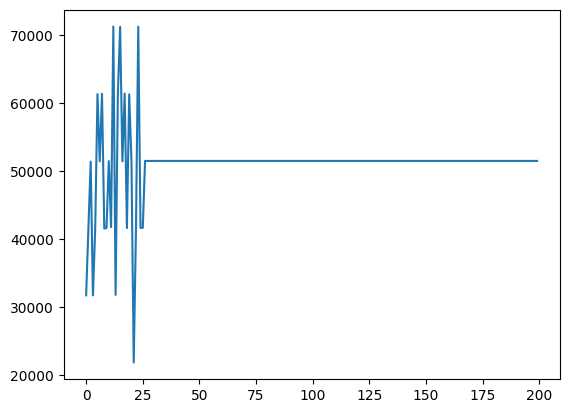

In [ ]:
formiga_best = Formiga(G, depots, alpha, beta, matriz_feromonios)

import matplotlib.pyplot as plt

x = []
for f in melhores_formigas:
    x.append(f.custo_caminho)

plt.plot(x)


Apenas um teste com valores padrões para usarmos como referencial.

**Teste 2**

**Reduzimos a taxa de evaporacao e aumentamos a taxa de deposito**

In [ ]:
taxa_evaporacao = 0.1
taxa_deposito = 100
alpha = 1.5
beta = 2
n_formigas = 30
iter_max = 200

formigas = []
melhores_formigas = []
matriz_feromonios = np.array([[1.0] * len(cities) for _ in range(len(cities))])

menor_caminho = 1000000

for i in range(iter_max):
    for _ in range(n_formigas):
        formiga = Formiga(G, depots, alpha, beta, matriz_feromonios)
        formigas.append(formiga)

        if formiga.custo_caminho < menor_caminho:
            melhor_formiga = formiga

    melhores_formigas.append(melhor_formiga)
    matriz_feromonios = atualizar_feromonios.best_so_far(matriz_feromonios, melhor_formiga, taxa_evaporacao, taxa_deposito)

    if i%20 == 0:
        print(i, melhores_formigas[i].custo_caminho)

0 41563
20 51410
40 71304
60 41551
80 61360
100 51432
120 51431
140 51431
160 51431
180 51431


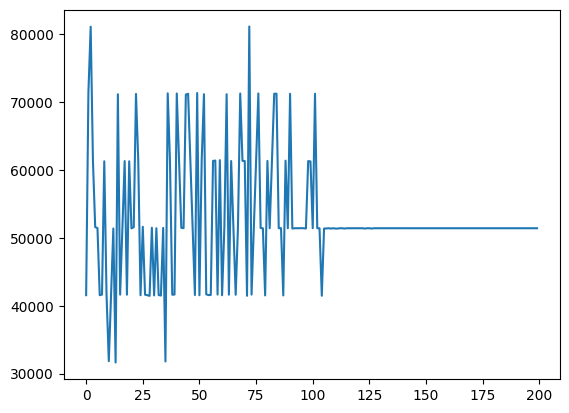

In [ ]:
formiga_best = Formiga(G, depots, alpha, beta, matriz_feromonios)

import matplotlib.pyplot as plt

x = []
for f in melhores_formigas:
    x.append(f.custo_caminho)

plt.plot(x)


Depositamos feromônio demais. Agora o sistema leva mais tempo para convergir para um ótimo global. Nesse teste também não encontramos valores para a melhor formiga de todas tão boa quanto no referencial, porém ele buscou resultados por um espaço maior. Podemos imaginar que as formigas ficam perdidas com tantos ferômonios (sinais que indicam para onde ir) e acabam indo pra qualquer lugar mesmo.

**Teste 3**

**Diminuiremos a taxa de deposito e aumentaremos a taxa de evaporacao**

In [ ]:
taxa_evaporacao = 0.8
taxa_deposito = 1
alpha = 1.5
beta = 2
n_formigas = 30
iter_max = 200

formigas = []
melhores_formigas = []
matriz_feromonios = np.array([[0.5] * len(cities) for _ in range(len(cities))])

menor_caminho = 1000000

for i in range(iter_max):
    for _ in range(n_formigas):
        formiga = Formiga(G, depots, alpha, beta, matriz_feromonios)
        formigas.append(formiga)

        if formiga.custo_caminho < menor_caminho:
            melhor_formiga = formiga

    melhores_formigas.append(melhor_formiga)
    matriz_feromonios = atualizar_feromonios.best_so_far(matriz_feromonios, melhor_formiga, taxa_evaporacao, taxa_deposito)

    if i%20 == 0:
        print(i, melhores_formigas[i].custo_caminho)

0 41770
20 51543
40 51543
60 51543
80 51543
100 51543
120 51543
140 51543
160 51543
180 51543


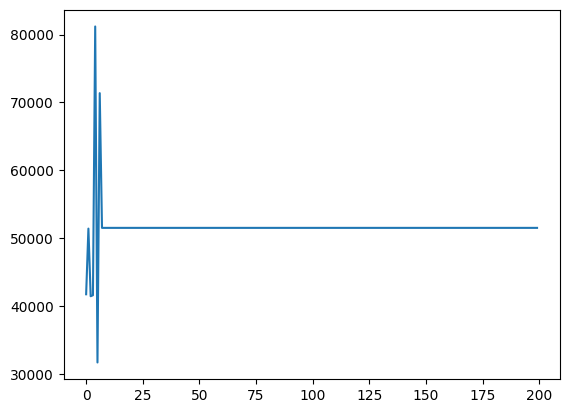

In [ ]:
formiga_best = Formiga(G, depots, alpha, beta, matriz_feromonios)
import matplotlib.pyplot as plt

x = []
for f in melhores_formigas:
    x.append(f.custo_caminho)

plt.plot(x)


**Teste 4**

**Iremos aumentar o valor de alfa e diminuir de beta**

In [ ]:
taxa_evaporacao = 0.5
taxa_deposito = 2
alpha = 2.
beta = 1
n_formigas = 30
iter_max = 200


formigas = []
melhores_formigas = []
matriz_feromonios = np.array([[0.5] * len(cities) for _ in range(len(cities))])

menor_caminho = 1000000

for i in range(iter_max):
    for _ in range(n_formigas):
        formiga = Formiga(G, depots, alpha, beta, matriz_feromonios)
        formigas.append(formiga)

        if formiga.custo_caminho < menor_caminho:
            melhor_formiga = formiga

    melhores_formigas.append(melhor_formiga)
    matriz_feromonios = atualizar_feromonios.best_so_far(matriz_feromonios, melhor_formiga, taxa_evaporacao, taxa_deposito)

    if i%20 == 0:
        print(i, melhores_formigas[i].custo_caminho)

0 31592
20 51424
40 51424
60 51424
80 51424
100 51424
120 51424
140 51424
160 51424
180 51424


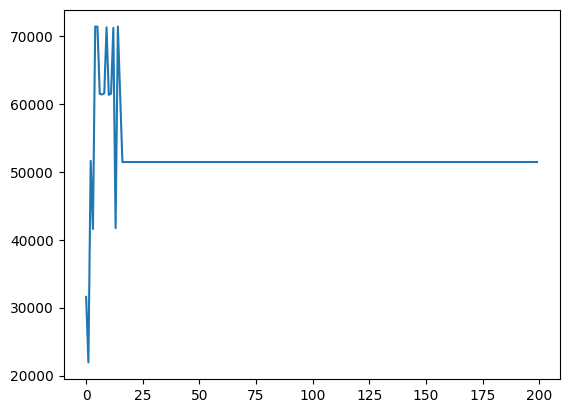

In [ ]:
formiga_best = Formiga(G, depots, alpha, beta, matriz_feromonios)
import matplotlib.pyplot as plt

x = []
for f in melhores_formigas:
    x.append(f.custo_caminho)

plt.plot(x)

Um ótimo local foi encontrado com muita velocidade. O ambiente testado implica em uma alta influência do feromônio e uma baixa influência da distância entre as cidades. Isso faz com que mesmo as melhores formigas acabem andando por caminhos muito custosos.

**Teste 5**

**Iremos aumentar o valor de beta e diminuir de alpha**

In [ ]:
taxa_evaporacao = 0.5
taxa_deposito = 2
alpha = 1
beta = 2.5
n_formigas = 30
iter_max = 200

formigas = []
melhores_formigas = []
matriz_feromonios = np.array([[0.5] * len(cities) for _ in range(len(cities))])

menor_caminho = 1000000

for i in range(iter_max):
    for _ in range(n_formigas):
        formiga = Formiga(G, depots, alpha, beta, matriz_feromonios)
        formigas.append(formiga)

        if formiga.custo_caminho < menor_caminho:
            melhor_formiga = formiga

    melhores_formigas.append(melhor_formiga)
    matriz_feromonios = atualizar_feromonios.best_so_far(matriz_feromonios, melhor_formiga, taxa_evaporacao, taxa_deposito)

    if i%20 == 0:
        print(i, melhores_formigas[i].custo_caminho)

0 51394
20 71220
40 41690
60 41690
80 41690
100 41690
120 41690
140 41690
160 41690
180 41690


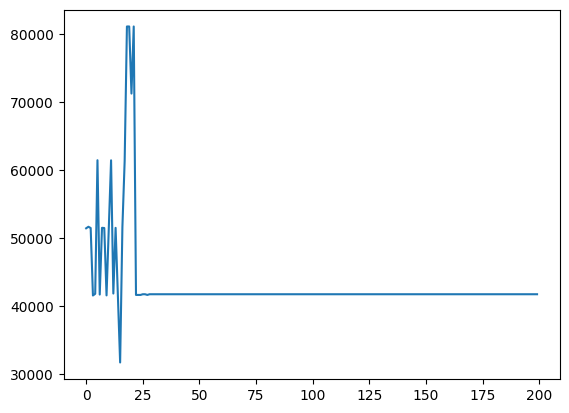

In [ ]:
formiga_best = Formiga(G, depots, alpha, beta, matriz_feromonios)
import matplotlib.pyplot as plt

x = []
for f in melhores_formigas:
    x.append(f.custo_caminho)

plt.plot(x)

Um ótimo local continou sendo encontrado muito rápido, porém agora o ótimo local encontrado já é bem melhor em relação aos testes anteriores. Nesse cenário, o custo de viajar de uma cidade para outra foi mais considerado, e o feromônio influenciou menos na decisão da formiga.

**Teste 6**

**Iremos aumentar o número de formigas**

In [ ]:
taxa_evaporacao = 0.4
taxa_deposito = 2
alpha = 1.5
beta = 2
n_formigas = 60
iter_max = 200

formigas = []
melhores_formigas = []
matriz_feromonios = np.array([[0.5] * len(cities) for _ in range(len(cities))])

menor_caminho = 1000000

for i in range(iter_max):
    for _ in range(n_formigas):
        formiga = Formiga(G, depots, alpha, beta, matriz_feromonios)
        formigas.append(formiga)

        if formiga.custo_caminho < menor_caminho:
            melhor_formiga = formiga

    melhores_formigas.append(melhor_formiga)
    matriz_feromonios = atualizar_feromonios.best_so_far(matriz_feromonios, melhor_formiga, taxa_evaporacao, taxa_deposito)

    if i%20 == 0:
        print(i, melhores_formigas[i].custo_caminho)

0 41614
20 71227
40 51448
60 51448
80 51448
100 51448
120 51448
140 51448
160 51448
180 51448


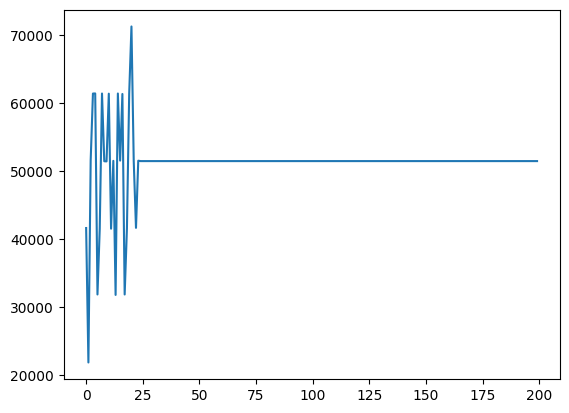

In [ ]:
formiga_best = Formiga(G, depots, alpha, beta, matriz_feromonios)
import matplotlib.pyplot as plt

x = []
for f in melhores_formigas:
    x.append(f.custo_caminho)

plt.plot(x)

Teste bem parecido com o referencial, o número de formigas para o problema da maneira na qual ele foi implementado (todas as formigas saindo e voltando para a mesma cidade) parece não ter influenciado o resultado.

**Teste 7**

**Iremos diminuir o número de formigas**

In [ ]:
taxa_evaporacao = 0.4
taxa_deposito = 2
alpha = 1.5
beta = 2
n_formigas = 15
iter_max = 200

formigas = []
melhores_formigas = []
matriz_feromonios = np.array([[0.5] * len(cities) for _ in range(len(cities))])

menor_caminho = 1000000

for i in range(iter_max):
    for _ in range(n_formigas):
        formiga = Formiga(G, depots, alpha, beta, matriz_feromonios)
        formigas.append(formiga)

        if formiga.custo_caminho < menor_caminho:
            melhor_formiga = formiga

    melhores_formigas.append(melhor_formiga)
    matriz_feromonios = atualizar_feromonios.best_so_far(matriz_feromonios, melhor_formiga, taxa_evaporacao, taxa_deposito)

    if i%20 == 0:
        print(i, melhores_formigas[i].custo_caminho)

0 31762
20 51506
40 41584
60 41584
80 41584
100 41584
120 41584
140 41584
160 41584
180 41584


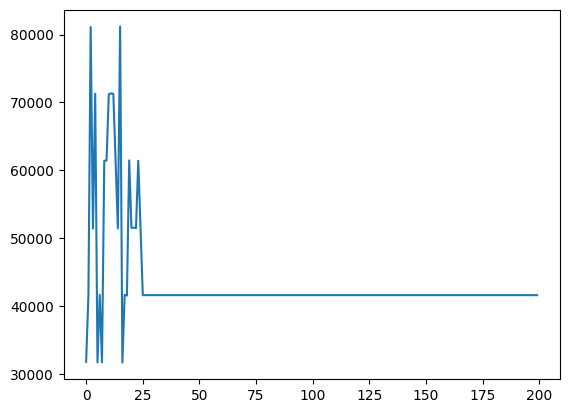

In [ ]:
formiga_best = Formiga(G, depots, alpha, beta, matriz_feromonios)
import matplotlib.pyplot as plt

x = []
for f in melhores_formigas:
    x.append(f.custo_caminho)

plt.plot(x)

A evolução do caminho encontrado pela melhor formiga de cada iteração está menos comportado do que os testes anteriores. Isso se deve ao fato de como há poucas formigas, há mais ruído pois a quantidade de informação disponível no ambiente seja bem menor, influenciando assim a tomada de decisão de cada indivíduo num espaço de busca menor.